In [2]:
# Step 1 : Import Libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
# Step 2 : Load the dataset
df = pd.read_csv("Mall_Customers.csv")

In [4]:
# Step 3 : Read the first five rows from the dataset
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
# Step 4 : Select features for clustring 
X = df[['Annual Income (k$)','Spending Score (1-100)']]

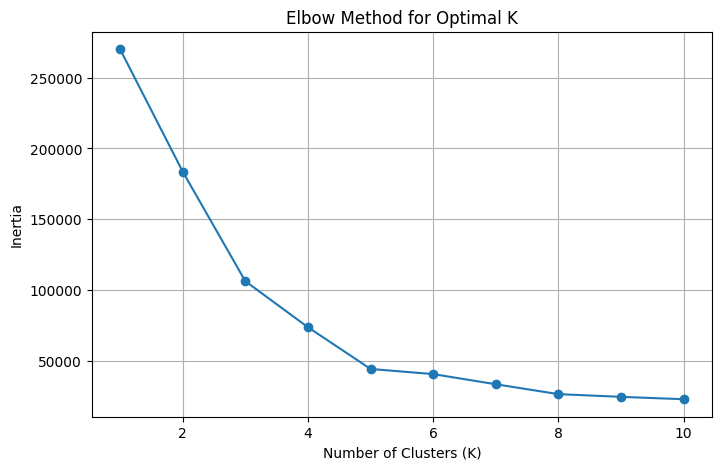

In [8]:
# Step 5 : Use Elbow method to find the best value of K 
inertia = []
K_range = range(1, 11)

for k in K_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    inertia.append(model.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()



In [9]:
# Step 6 : decide which K to use 
# What We See:
# A sharp drop in inertia from K=1 → K=3

# Then a slower drop from K=4 onward

# After K=5, the line starts to flatten noticeably so K = 5

kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)






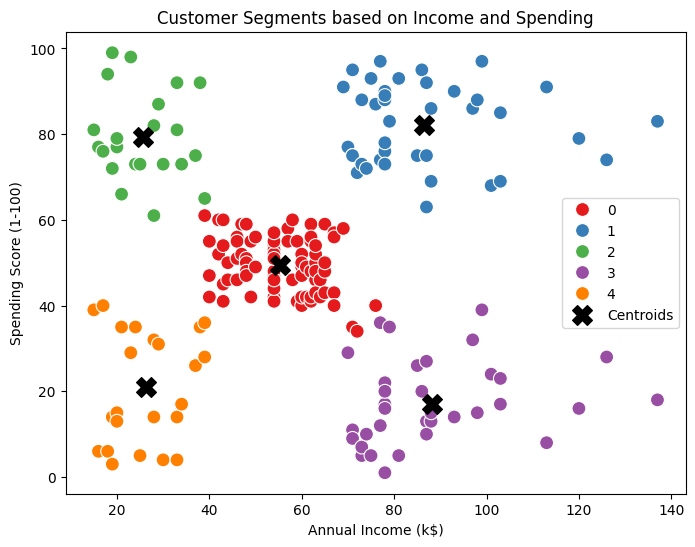

In [10]:
# Step 7 : Visualize the clusters 
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', 
                hue='Cluster', palette='Set1', s=100)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            color='black', marker='X', s=200, label='Centroids')
plt.title('Customer Segments based on Income and Spending')
plt.legend()
plt.show()



In [12]:
#Step 8 : “After visualizing the clusters, how do I actually use this information in real life?”

# Let’s turn that beautiful cluster plot into real business insight.
# Group by cluster and calculate the average values
cluster_summary = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(2)
print(cluster_summary)



           Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                   
0        42.72               55.30                   49.52
1        32.69               86.54                   82.13
2        25.27               25.73                   79.36
3        41.11               88.20                   17.11
4        45.22               26.30                   20.91


In [13]:
# Step 9 : describe each group in a business-oriented way :

# Cluster 0: Average Spenders – Mid-Age, Middle Income
# Age: ~43 years

# Income: ~55k

# Spending Score: ~50

# Business Insight:
# This group is balanced.
# They have a moderate income and spend moderately. 
# Likely, they are practical buyers who respond to value-based promotions. 
# You might attract them with loyalty programs and targeted seasonal discounts.


# Cluster 1: Young High-Income Big Spenders
# Age: ~33 years

# Income: ~87k

# Spending Score: ~82

# Business Insight:
# This is your ideal customer segment.
# They’re young, wealthy, and spend a lot.
# Focus on luxury products, exclusive offers, and VIP experiences. 
# They may be responsive to status-driven marketing and personalized services.



# Cluster 2: Young Low-Income High Spenders
# Age: ~25 years

# Income: ~26k

# Spending Score: ~79

# Business Insight:
# These are impulse buyers – young with low income but high spending.
# They may be drawn to trendy, affordable, and fast-fashion-type products. 
# A great audience for social media campaigns and limited-time deals.

# Cluster 3: Wealthy but Conservative Spenders
# Age: ~41 years

# Income: ~88k

# Spending Score: ~17

# Business Insight:
# This group has high income but low spending.
# They could be budget-conscious or disengaged.
# Try to build trust through customer education, testimonials, and value propositions. 
# Promotions that emphasize long-term value or investment-type products may appeal to them.

# Cluster 4: Older Low-Income Low Spenders
# Age: ~45 years

# Income: ~26k

# Spending Score: ~21

# Business Insight:
# This is the least profitable segment.
# Likely price-sensitive and less engaged. 
# Focus should be on basic needs, discounted essentials, or community-driven engagement (e.g., senior offers or bundles).



